Text(0,0.5,'Infected Incidence')

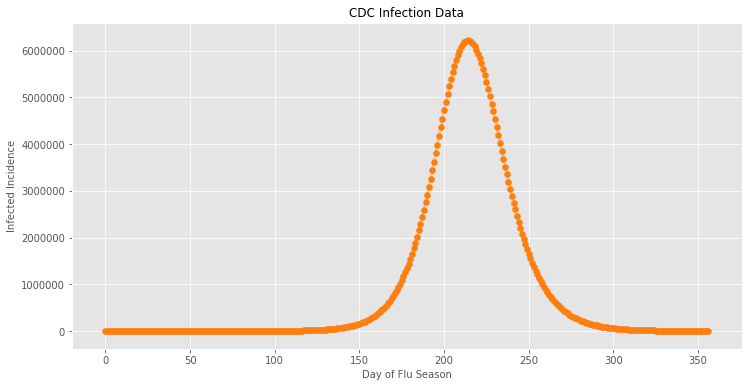

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import numpy as np
%matplotlib inline

plt.style.use('ggplot')
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
    (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
    (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
    (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
    (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

for i in range(len(tableau20)):
    r, g, b = tableau20[i]
    tableau20[i] = (r / 255., g / 255., b / 255.)
    

virusLibrary = [('B', 1.24), ('A (H1)', 1.27), ('A (H3)', 1.25), ('A (Subtyping not Performed)', 1.26)]

N = 310000000
I0 = 1
R0 = 0
S0 = N - R0 - I0

gamma = 1.0/3.0
rho = 1.24
beta = rho*gamma

dy = []

def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = dy[0](y, t, N, beta, gamma)
    dIdt = dy[1](y, t, N, beta, gamma)
    dRdt = dy[2](y, t, N, beta, gamma)
    return dSdt, dIdt, dRdt

y0 = S0, I0, R0
dy.append(lambda y, t, N, beta, gamma: -beta * y[0] * y[1] / N)
dy.append(lambda y, t, N, beta, gamma: beta * y[0] * y[1] / N - gamma * y[1])
dy.append(lambda y, t, N, beta, gamma: gamma * y[1])

minT = 0
maxT = 51
t = list(range(minT*7, maxT*7))
w = range(minT+1, maxT)

ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

plt.figure(figsize=(12,6))
plt.plot(t, I, lw=2.5, color=tableau20[2], alpha=0.3)
plt.scatter(t, I, color=tableau20[2])
plt.title("CDC Infection Data", fontsize=12)
plt.xlabel("Day of Flu Season", fontsize=10)
plt.ylabel("Infected Incidence", fontsize=10)

In [30]:
import inspect

virusLibrary = [('B', 1.24), ('A (H1)', 1.27), ('A (H3)', 1.25), ('A (Subtyping not Performed)', 1.26)]
virusSet = [virusLibrary[3], virusLibrary[2]]

gamma = 1.0/3.0
rho = [x[1] for x in virusSet]
beta = [x*gamma for x in rho]

fs = [(lambda x=x,y: x*y) for x in rho]
for f in fs:
    print(inspect.getsource(f))

SyntaxError: non-default argument follows default argument (<ipython-input-30-e4b1c37b304b>, line 10)